In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import unique
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

Stack all light curves as a large table ... 

In [42]:
saveDir = '../data_products/Combined_LC/'
lcs=  os.listdir(saveDir)

# initialie the table to which we vstack all tables... 
#lcc = Table.read(saveDir+lcs[0], format='ascii')
mjds = list(np.zeros(len(lcs)))
surveys = list(np.zeros(len(lcs)))
for i in range(len(lcs)):
    if (i % 1000) == 0 : 
        print(i)
    lcname = lcs[i]
    lc_comb = Table.read(saveDir+lcname, format='ascii')
    # assignment much faster than stacking ... 
    mjds[i] = lc_comb['mjd'].data
    surveys[i] = lc_comb['originSurvey'].data
    #lcc = vstack([lc_comb, lcc])


0
1000
2000
3000
4000
5000
6000


In [33]:
# Save what we have ...  120 MB 
##print(i)
#lcc.write('stacked_combined_LC_up_to_i_'+str(i)+'.txt', format='ascii')

3922


Plot the histogram of all epochs ... ( using SDSS(r),  CRTS(V), PTF(gR), PS1(gri) ) 

In [46]:
mjdsc = np.concatenate(mjds)
surveysc = np.concatenate(surveys)

In [48]:
print('We have in total ', len(mjdsc) , ' epochs ')
# counting SDSSr,  CRTSV,  PS1gri , PTFgR 

We have in total  2173997  epochs 


sdss 0 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
ps1 1 (1.0, 0.4980392156862745, 0.054901960784313725)
ptf 2 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
crts 3 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
lsst 4 (0.5803921568627451, 0.403921568627451, 0.7411764705882353)


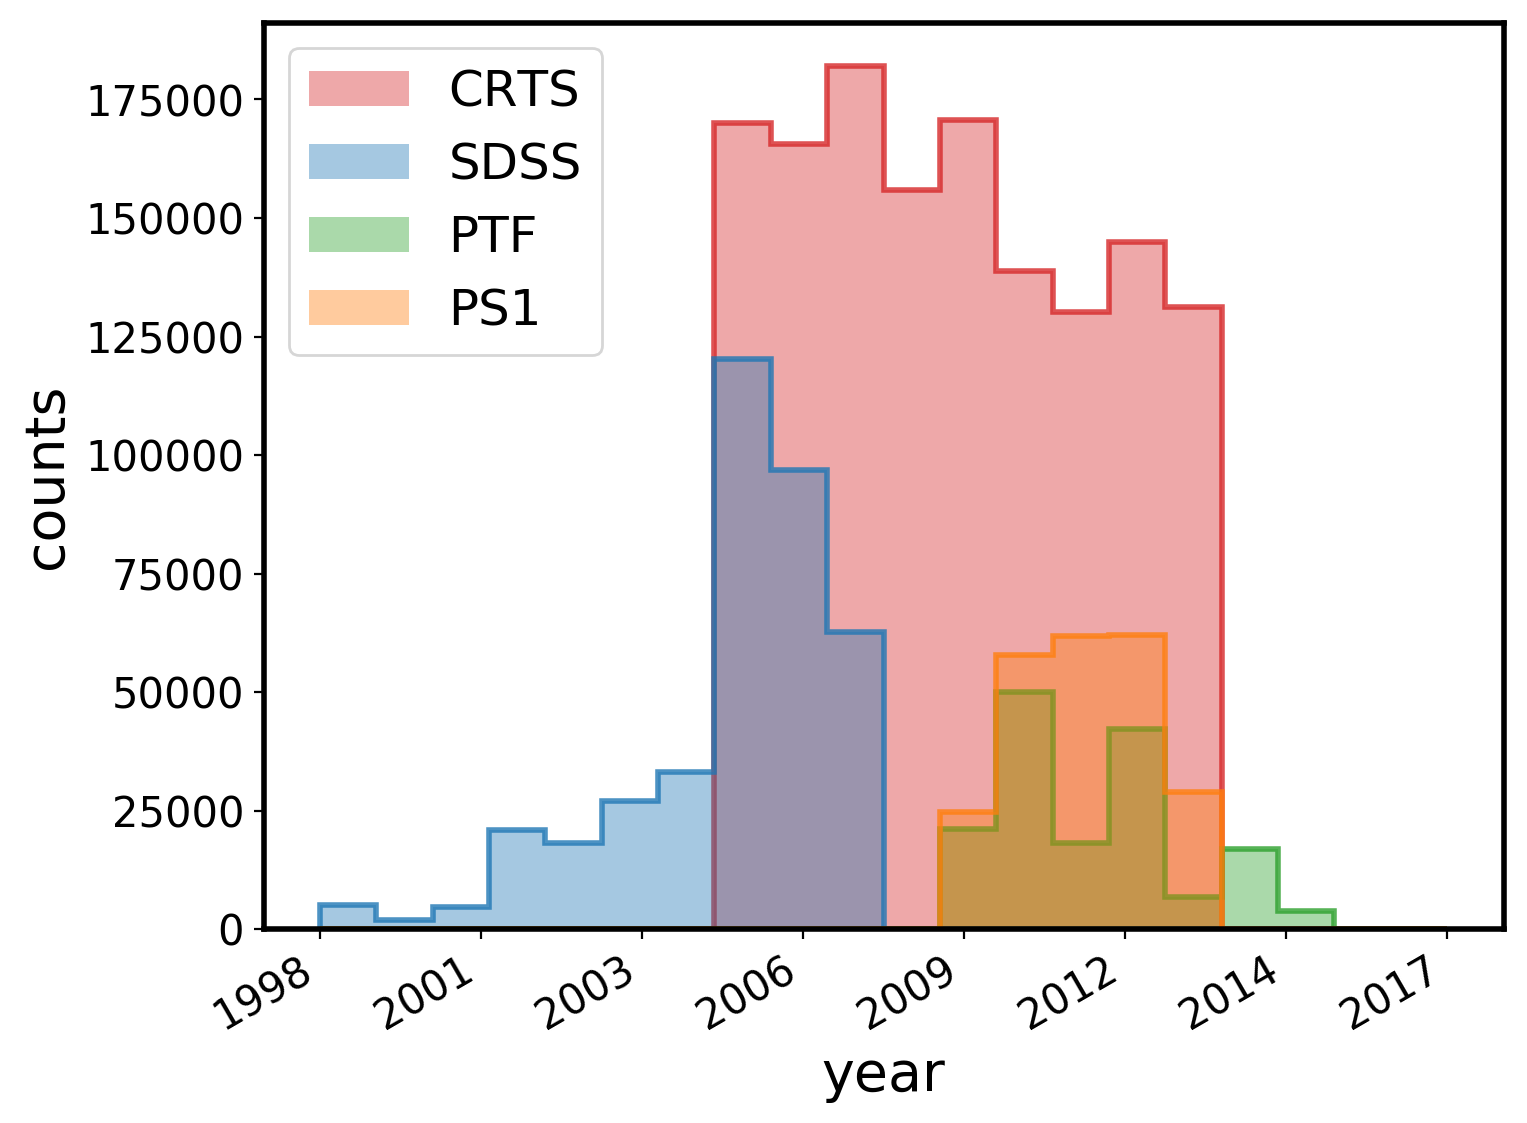

In [50]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns 
from astropy.time import Time
import matplotlib.dates as mdates

current_palette = sns.color_palette()
#sns.palplot(current_palette)

seg = 'sdss-ps1-ptf-crts-lsst'
cdic = {}
for i, survey in enumerate(seg.split("-")):
    color = current_palette[i] 
    print(survey,i,color)
    cdic[survey]= color 
    
fig,ax = plt.subplots(1,1,figsize=(8,6), dpi=100)
lw = 2 ; bins = 20 ; 
for survey in  ['crts', 'sdss', 'ptf', 'ps1']: 
    m = surveysc == survey
    mjd = mjdsc[m]
    ax.hist(mjd, histtype='stepfilled',lw=lw, bins = bins, 
                alpha=0.4, label=survey.upper(),
            color=cdic[survey], range=(51000,58000),
           )
    ax.hist(mjd, histtype='step',lw=lw, bins = bins, label='',
                alpha=0.8, color=cdic[survey],range=(51000,58000))
    
ax.legend(fontsize=18, loc='upper left')
ax.set_ylabel('counts')
ax.set_xlabel('year')
#ax.set_title('QSO S82 epochs')
a=ax.get_xticks().tolist()
t = Time(a , format='mjd')
year = [d.datetime.year for d in t]
ax.set_xticklabels(year)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig('illustrate_epochal_coverage.png', bbox_inches='tight')


In [15]:
seg = 'sdss-ps1-ptf-crts-lsst'
seg.split('-')

['sdss', 'ps1', 'ptf', 'crts', 'lsst']

In [4]:
sp = Table.read('sdss-poss_release.dat', format='ascii')

In [6]:
# show those that have S82 light curves...
sp[sp['s82flag'] == 1]

ra,dec,plateID,EpochG,EpochR,EpochI,G_POSS,G_ERR,G_GOOD,R_POSS,R_ERR,R_GOOD,I_POSS,I_ERR,I_GOOD,SDR7ID,M_i,redshift,mbh,lbol,A_u,nobs,s82flag,mjd_r_SDSS,g_SDSS,g_ERR,r_SDSS,r_ERR,i_SDSS,i_ERR
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64
318.56594,-1.221275,887,1990.5598,1991.538,1995.5077,20.16,0.19,0.0,20.18,0.3,1.0,-99.99,-99.99,0.0,-30475,-25.55,2.2897,8.629,46.019,0.372,50,1,51819.0,20.617,0.034,20.343,0.029,20.212,0.039
318.57498,-1.196214,887,1990.5598,1991.538,1995.5077,19.45,0.14,0.0,19.51,0.25,1.0,19.46,0.34,1.0,-30474,-27.065,2.9488,9.262,46.843,0.379,53,1,51819.0,19.889,0.02,19.536,0.017,19.387,0.021
318.59751,-1.186403,887,1990.5598,1991.538,1995.5077,18.85,0.1,0.0,19.38,0.24,1.0,19.44,0.34,1.0,-30471,-25.411,1.2785,9.096,46.398,0.388,54,1,51819.0,19.344,0.014,18.993,0.012,19.005,0.016
318.60293,-1.148829,887,1990.5598,1991.538,1995.5077,17.83,0.08,0.0,17.78,0.13,0.0,18.74,0.28,0.0,-30470,-25.575,1.1153,9.333,46.352,0.388,54,1,51819.0,18.979,0.011,18.502,0.009,18.63,0.012
319.13246,-1.179863,887,1990.5598,1991.538,1995.5077,18.97,0.11,0.0,19.1,0.21,1.0,18.88,0.29,1.0,-30435,-25.557,1.3728,9.608,46.326,0.306,53,1,51819.0,19.561,0.016,19.162,0.013,19.104,0.018
319.564,-1.092455,887,1990.5598,1991.538,1995.5077,18.61,0.09,0.0,18.83,0.19,0.0,19.02,0.3,0.0,-30401,-25.599,1.3791,8.921,46.318,0.293,54,1,51819.0,19.693,0.017,19.216,0.014,19.183,0.018
319.82138,-1.247447,887,1990.5598,1991.538,1995.5077,17.99,0.08,0.0,18.27,0.16,0.0,18.56,0.26,0.0,-30377,-25.614,0.9956,8.835,46.386,0.243,54,1,51819.0,18.549,0.008,18.209,0.008,18.183,0.01
319.9278,-1.09079,887,1990.5598,1991.538,1995.5077,18.07,0.08,0.0,18.01,0.14,1.0,18.83,0.28,1.0,-30368,-26.366,1.3945,9.544,46.658,0.247,54,1,51819.0,18.688,0.009,18.285,0.008,18.198,0.01
320.61683,-1.086815,887,1990.5598,1991.538,1995.5077,18.97,0.11,0.0,19.24,0.22,1.0,19.24,0.32,1.0,-30316,-25.351,1.2603,9.127,46.313,0.239,53,1,51819.0,19.269,0.013,18.987,0.011,18.942,0.014


I'm not sure if it's worth much. We'd need to express POSS in terms of SDSS (apply photometric offset), and then it only gives 2-3 points (depending on whether we use G,R,or also I from POSS). The advantage is that the measurements are so long ago, but with small-number statistics this may not be useful for DRW fitting - that's why Chelsea did population SF studies to have enough $\Delta m$ points .... 

In [8]:
lcname

'1441903.txt'